# Proyek Analisis Data: Bike Sharing Dataset
- **Nama**: Meisy Nathania Yogianty
- **Email**: meisynathania.y@gmail.com
- **ID Dicoding**: meisynathania

## Pertanyaan Bisnis:
1. Pada musim apa sepeda paling banyak disewakan?
2. Pada jam berapa bisnis persewaan sepeda ideal dibuka?

## Analisis Data

### 1. Persiapan
Pada tahap ini, dilakukan import library dan setting directory kerja

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import numpy as np
sns.set(style='dark')

### 2. Data Wrangling

#### a. Data Gathering

In [9]:
daily = pd.read_csv("day.csv")
daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
hourly = pd.read_csv("hour.csv")
hourly.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### b. Data Assessing

In [11]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada kedua tabel, kolom dteday yang menyimpan tanggal masih bertipe object, maka harus diganti menjadi tipe tanggal yang sesuai

In [13]:
print(hourly.isna().sum())
print(daily.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [14]:
print(daily.duplicated().sum())
print(hourly.duplicated().sum())

0
0


Kedua tabel tidak memiliki missing value dan data duplikat

Selanjutnya, cek parameter statistik kedua tabel:

In [15]:
daily.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
hourly.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### c. Data Cleaning

In [17]:
daily['dteday']= pd.to_datetime(daily['dteday'])
daily['season'].replace([1,2,3,4],['springer','summer', 'fall', 'winter'],inplace=True)
daily['yr'].replace([0,1],['2011','2012'],inplace=True)
daily['mnth'] = daily['mnth'].astype(str)
daily['holiday'].replace([0,1],['not holiday','holiday'],inplace=True)
daily['weekday'] = daily['weekday'].astype(str)
daily['workingday'].replace([0,1],['weekend/holiday','workingday'],inplace=True)
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [18]:
hourly['dteday']= pd.to_datetime(hourly['dteday'])
hourly['season'].replace([1,2,3,4],['springer','summer', 'fall', 'winter'],inplace=True)
hourly['yr'].replace([0,1],['2011','2012'],inplace=True)
hourly['mnth'] = hourly['mnth'].astype(str)
hourly['holiday'].replace([0,1],['not holiday','holiday'],inplace=True)
hourly['weekday'] = hourly['weekday'].astype(str)
hourly['workingday'].replace([0,1],['weekend/holiday','workingday'],inplace=True)
hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  object        
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Setelah semua kolom dipastikan bersih, unduh file data yang telah dibersihkan 

In [19]:
hourly.to_csv("hourly_clean.csv", index=False)daily.to_csv("daily_clean.csv", index=False)

### 2. Exploratory Data Analysis

In [20]:
daily.describe(include = "all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,2012,1,not holiday,6,workingday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [21]:
hourly.describe(include = "all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,2012,5,NaN,not holiday,6,workingday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,11865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


a. Perbandingan Sepeda Tersewa saat holiday dan not holiday

In [22]:
daily.groupby(by="holiday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
            nunique   max   min         mean          std
holiday                                                  
holiday          21  7403  1000  3735.000000  2103.350660
not holiday     710  8714    22  4527.104225  1929.013947

In [23]:
hourly.groupby(by="hr").agg({
    "cnt": ["max", "min", "mean", "std"],
})

cnt                            
    max min        mean         std
hr                                 
0   283   2   53.898072   42.307910
1   168   1   33.375691   33.538727
2   132   1   22.869930   26.578642
3    79   1   11.727403   13.239190
4    28   1    6.352941    4.143818
5    66   1   19.889819   13.200765
6   213   1   76.044138   55.084348
7   596   1  212.064649  161.441936
8   839   5  359.011004  235.189285
9   426  14  219.309491   93.703458
10  539   8  173.668501  102.205413
11  663  10  208.143054  127.495536
12  776   3  253.315934  145.081134
13  760  11  253.661180  148.107657
14  750  12  240.949246  147.271574
15  750   7  251.233196  144.632541
16  783  11  311.983562  148.682618
17  976  15  461.452055  232.656611
18  977  23  425.510989  224.639304
19  743  11  311.523352  161.050359
20  567  11  226.030220  119.670164
21  584   6  172.314560   89.788893
22  502   9  131.335165   69.937782
23  256   2   87.831044   50.846889

#1 Perbandingan peminjaman sepeda di tiap musim

In [24]:
seasonal = pd.DataFrame(daily.groupby(by=["season","yr"]).agg({
    "cnt": ["sum"],
}).unstack())
seasonal

cnt        
             sum        
yr          2011    2012
season                  
fall      419650  641479
springer  150000  321348
summer    347316  571273
winter    326137  515476

In [25]:
grouped_data = seasonal.groupby(['season'])['cnt'].sum().unstack()
grouped_data

          yr    season  
cnt  sum  2011  fall        419650
                springer    150000
                summer      347316
                winter      326137
          2012  fall        641479
                springer    321348
                summer      571273
                winter      515476
dtype: int64

<Axes: xlabel='None,None,yr,season'>

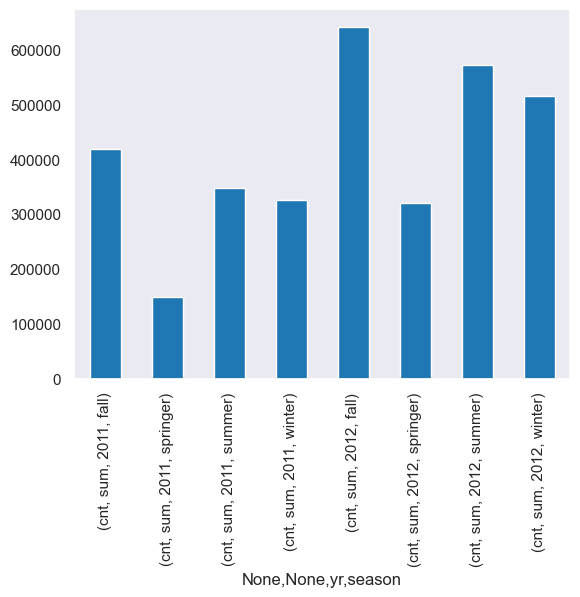

In [26]:
grouped_data.plot(kind='bar', colormap='tab20')

Berdasarkan data bar chart di atas, terlihat pola berulang tiap tahun untuk jumlah sepeda tersewa di tiap musimnya

#2 Untuk menentukan jam buka yang tepat guna memperoleh keuntungan optimal, pemilik bisnis tentu perlu mengetahui jumlah sepeda tersewa per jam setiap harinya

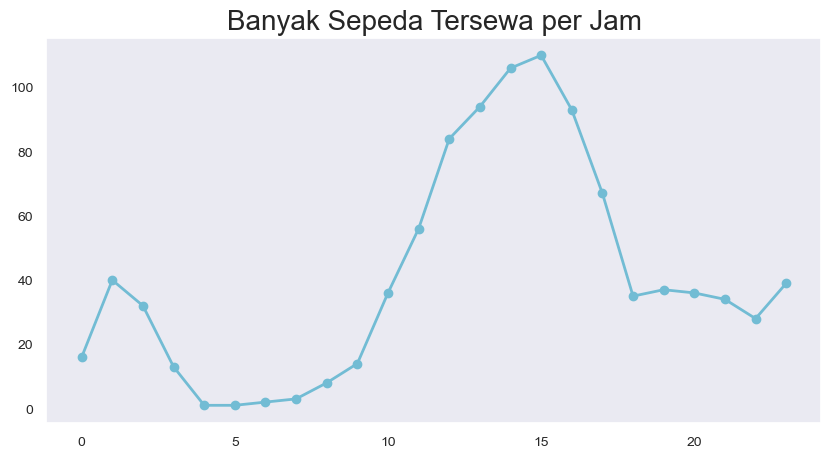

In [27]:
hourly_day = hourly[hourly["dteday"] == '2011-01-01']
#tanggalnya dapat diganti untuk melihat perubahan per hari
plt.figure(figsize=(10, 5)) 
plt.plot(hourly_day["hr"], hourly_day["cnt"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Banyak Sepeda Tersewa per Jam", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

## Visualization and Explanatory Analysis

Prototype Dashboard

In [28]:
selected_year = '2011'

# Subset the data for the specified year and season
subset_data = daily[(daily['yr'] == selected_year)]
subset_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,not holiday,6,weekend/holiday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,1,not holiday,0,weekend/holiday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,1,not holiday,1,workingday,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,1,not holiday,2,workingday,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,1,not holiday,3,workingday,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,2011-12-27,springer,2011,12,not holiday,2,workingday,2,0.325000,0.327633,0.762500,0.188450,103,1059,1162
361,362,2011-12-28,springer,2011,12,not holiday,3,workingday,1,0.299130,0.279974,0.503913,0.293961,255,2047,2302
362,363,2011-12-29,springer,2011,12,not holiday,4,workingday,1,0.248333,0.263892,0.574167,0.119412,254,2169,2423
363,364,2011-12-30,springer,2011,12,not holiday,5,workingday,1,0.311667,0.318812,0.636667,0.134337,491,2508,2999


In [29]:
seasonal = subset_data.groupby('season')['cnt'].sum()
seasonal

season
fall        419650
springer    150000
summer      347316
winter      326137
Name: cnt, dtype: int64

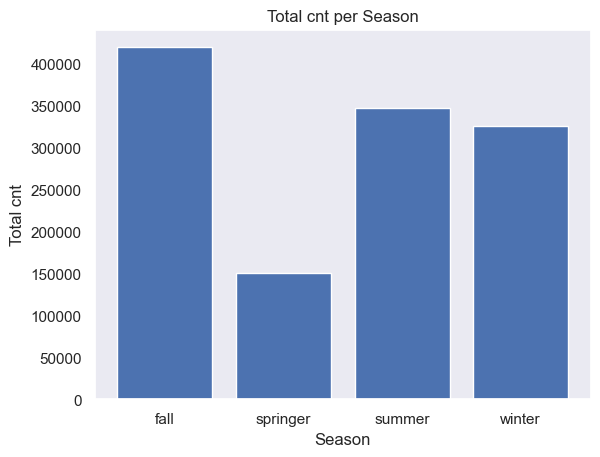

In [30]:
plt.bar(seasonal.index, seasonal)
plt.xlabel("Season")
plt.ylabel("Total cnt")
plt.title("Total cnt per Season")
plt.show()

In [1]:
#untuk metriks
totalcnt = daily.cnt.sum()
totalcnt

NameError: name 'daily' is not defined

## Conclusion
1. Pada musim gugur (fall), sepeda berhasil disewakan dengan jumlah paling banyak. Berikutnya, musim panas (summer) berada di urutan kedua, lalu musim salju (winter) di urutan ketiga, dan terakhir musim semi (spring) di urutan terakhir. Optimasi revenue dapat dilakukan di musim gugur, panas, dan salju.
2. Berdasarkan tren penyewa, bisnis ini paling cocok untuk memiliki jam operasi dari pukul 05.00-20.00?

## DASHBOARD BUILD

In [ ]:
#dashboard
sidebarOpt = st.sidebar.selectbox(
    'Bike Share Dashboard Menu',
    ('Daily Report','Seasonal Report')
)
if sidebarOpt == 'Daily Report' or sidebarOpt =='':
    st.header('DAILY REPORT')
    #jumlah sepeda tersewa per jam setiap harinya
    dateInput = st.date_input(
        label='Pilih Tanggal',
        value = datetime.date(2011, 1, 1)
    )
    hourly_day = hourly[hourly["dteday"] == str(dateInput)] #subset data per hari
    daily_day = daily[daily["dteday"] == str(dateInput)]
    totalcnt = daily_day.cnt.sum()
    st.metric("Total Sepeda Tersewa", value = totalcnt)
    plt.figure(figsize=(10, 5)) 
    plt.plot(hourly_day["hr"], hourly_day["cnt"], marker='o', linewidth=2, color="#72BCD4") 
    plt.title("Banyak Sepeda Tersewa per Jam", loc="center", fontsize=20) 
    plt.xticks(fontsize=10) 
    plt.yticks(fontsize=10) 
    plt.show()
    st.pyplot(plt)
elif sidebarOpt == 'Seasonal Report':
    st.header("SEASONAL REPORT")
    #perbandingan peminjaman sepeda di tiap musim
    year = ['2011', '2012']
    selected_year = st.radio("Tahun", 
                             year, key="2011")
    subset_data = daily[(daily['yr'] == selected_year)]
    seasonal = subset_data.groupby('season')['cnt'].sum()
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.bar(seasonal.index, seasonal.values,
           color='skyblue', label='Total')
    ax.set_xlabel("Musim")
    ax.set_ylabel("Total")
    ax.set_title("Banyak Sepeda Tersewa tiap Musim")
    st.pyplot(fig)